<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/binary_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [52]:
#seleccionando 10000 palabras
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [53]:
#Obtengo las palabras con una función determinada de la libería
word_index=imdb.get_word_index()

In [54]:
#Cambio el orden de los valores para que primero me aparezca el numero
word_index=dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
word_index

In [ ]:
#funcion para imprimir las palabras
for _ in train_data[0]:
  print(word_index.get(_ -3)) #el -3 se pone porque las primeras 3 palabras son palabras reservadas

In [57]:
#
def vectorizar(sequences,dim=10000):
  results=np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [59]:
x_train=vectorizar(train_data)
x_test=vectorizar(test_data)

In [46]:
#Siempre es recomendado tener los datos en tipo float32

y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

### Crearemos el **modelo**

In [65]:
model=models.Sequential() #Modelo tipo secuencial
model.add(layers.Dense(16,activation="relu",input_shape=(10000,))) #capas densas de 16 neuronas con activacion reLu
model.add(layers.Dense(16,activation="relu")) #estas capas no requieren input porque son ocultas
model.add(layers.Dense(1,activation="sigmoid")) #Se cambia de función de activación por una apta para probabilidad 



In [66]:
model.compile(optimizer="rmsprop", #tipo de funcion optimizadora
              loss="binary_crossentropy",  #función de pérdida
              metrics=["acc"]) 

### Crearemos data de validacion

In [67]:
x_val= x_train[:10000]
partial_x_train=x_train[10000:]

y_val= y_train[:10000]
partial_y_train= y_train[10000:]

In [68]:
print(partial_y_train.shape)
print(partial_x_train.shape)
print(y_train.shape)
print(x_train.shape)

(15000,)
(15000, 10000)
(25000,)
(25000, 10000)


In [70]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/10
30/30 [==============================] - 2s 72ms/step - loss: 0.1536 - acc: 0.9501 - val_loss: 0.2892 - val_acc: 0.8860
Epoch 2/10
30/30 [==============================] - 1s 40ms/step - loss: 0.1317 - acc: 0.9575 - val_loss: 0.2907 - val_acc: 0.8865
Epoch 3/10
30/30 [==============================] - 1s 38ms/step - loss: 0.1094 - acc: 0.9664 - val_loss: 0.3281 - val_acc: 0.8756
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0916 - acc: 0.9737 - val_loss: 0.3191 - val_acc: 0.8829
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0800 - acc: 0.9772 - val_loss: 0.3398 - val_acc: 0.8788
Epoch 6/10
30/30 [==============================] - 2s 61ms/step - loss: 0.0670 - acc: 0.9823 - val_loss: 0.3833 - val_acc: 0.8699
Epoch 7/10
30/30 [==============================] - 1s 50ms/step - loss: 0.0564 - acc: 0.9869 - val_loss: 0.3733 - val_acc: 0.8777
Epoch 8/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0497 - a

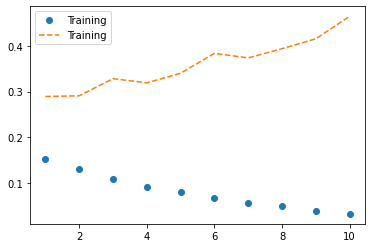

In [82]:
import matplotlib.pyplot as plt

#Obtenemos un diccionario del cambio de los valores en el entrenamiento
history_dict=history.history

loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="Training")
plt.plot(epoch,val_loss_values,"--",label="Training")
plt.legend()
plt.show()

In [83]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5105 - acc: 0.8552


[0.5105448961257935, 0.8551599979400635]

Asi vemos que nuestro modelo tiene un accuracy del 85%
